In [1]:
import numpy as np
import pandas as pd

In [2]:
loan_data_inputs_train = pd.read_csv("loan_data_inputs_train.csv", index_col = 0)
loan_data_targets_train = pd.read_csv("loan_data_targets_train.csv", index_col = 0)

In [3]:
loan_data_inputs_test = pd.read_csv("loan_data_inputs_test.csv", index_col = 0)
loan_data_targets_test = pd.read_csv("loan_data_targets_test.csv", index_col = 0)

In [4]:
loan_data_backup = pd.read_csv("loan_data_2015.csv", low_memory = False)

In [5]:
loan_data = loan_data_backup.copy()

In [6]:
pd.options.display.max_columns = None

In [7]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,68444620,73334399,35000,35000,35000.0,60 months,11.99,778.38,C,C1,Foreign Service Officer,10+ years,MORTGAGE,128000.0,Source Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,200xx,DC,6.46,0.0,Feb-90,0.0,46.0,NaN,17.0,0.0,14277,27.4,46.0,w,35000.0,35000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,56.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,321.0,146867.0,1.0,11.0,0.0,0.0,28.0,35367.0,49.3,0.0,1.0,5020.0,40.1,52200.0,1.0,4.0,0.0
1,68547583,73437441,8650,8650,8650.0,36 months,5.32,260.50,A,A1,Associate Consultant,< 1 year,MORTGAGE,100000.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,462xx,IN,7.28,0.0,Jul-01,0.0,NaN,NaN,15.0,0.0,7158,26.7,24.0,w,8650.0,8650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,165450.0,0.0,1.0,1.0,1.0,11.0,24041.0,88.8,0.0,3.0,3081.0,57.9,26800.0,1.0,0.0,5.0
2,67849662,72708407,4225,4225,4225.0,36 months,14.85,146.16,C,C5,mechanic,5 years,RENT,35000.0,Source Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,672xx,KS,15.22,2.0,Jul-11,0.0,18.0,NaN,6.0,0.0,1058,24.6,6.0,w,4225.0,4225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,4888.0,0.0,1.0,0.0,0.0,47.0,3830.0,21.9,0.0,0.0,367.0,22.4,4300.0,0.0,0.0,0.0
3,68506885,73396712,10000,10000,10000.0,60 months,11.99,222.40,C,C1,CARDIOVASCULAR TECH,10+ years,RENT,42500.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,460xx,IN,31.04,0.0,Dec-98,1.0,NaN,NaN,10.0,0.0,5812,40.9,23.0,w,10000.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,41166.0,1.0,3.0,0.0,2.0,13.0,35354.0,75.5,1.0,1.0,3118.0,67.4,14200.0,1.0,1.0,1.0
4,68341763,72928789,20000,20000,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-00,0.0,NaN,NaN,6.0,0.0,7869,56.2,18.0,w,20000.0,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Dec-15,0.0,NaN,1,JOINT,71000.0,13.85,Not Verified,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,72.8,0.0,2.0,2081.0,64.7,14000.0,2.0,5.0,1.0


In [8]:
from datetime import datetime, timedelta
#tenure of employment
loan_data['emp_length'].value_counts()

emp_length
10+ years    141520
2 years       37497
< 1 year      34340
3 years       33430
1 year        27473
5 years       24930
4 years       24506
8 years       21560
7 years       18414
6 years       16838
9 years       16769
Name: count, dtype: int64

In [9]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('< 1 year','0', regex = False)
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'].str.replace(r'\D','',regex = True))
loan_data['emp_length_int'].value_counts()

emp_length_int
10.0    141520
2.0      37497
0.0      34340
3.0      33430
1.0      27473
5.0      24930
4.0      24506
8.0      21560
7.0      18414
6.0      16838
9.0      16769
Name: count, dtype: int64

In [10]:
#term of loan payment
loan_data['term'].value_counts()

term
36 months    283172
60 months    137922
Name: count, dtype: int64

In [11]:
loan_data['term_int'] = pd.to_numeric(loan_data['term'].str.replace(r'\D','', regex = True))
loan_data['term_int'].value_counts()

term_int
36    283172
60    137922
Name: count, dtype: int64

In [12]:
#earliest credit line
loan_data['earliest_cr_line'].sample(10)

311991    Mar-00
334414    May-91
61662     Mar-08
254069    Jun-98
23706     May-03
156870    Jul-08
9862      Sep-96
50649     Oct-87
411869    Apr-94
269961    Feb-00
Name: earliest_cr_line, dtype: object

In [13]:
#didnt work for years before 1970
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')
loan_data['earliest_cr_line_date'] = loan_data['earliest_cr_line'].apply(lambda x : (datetime.strptime(x, "%b-%y")\
    .replace(year = 1900 + int(x[-2:]) if int(x[-2:]) > 24 else 2000 + int(x[-2:])) ) if pd.notnull(x) else pd.NaT)
loan_data['mths_since_earliest_cr_line'] = round((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date'])/np.timedelta64(30,'D'))
loan_data['mths_since_earliest_cr_line'].describe()

count    421094.000000
mean        233.952495
std          92.663751
min          62.000000
25%         170.000000
50%         215.000000
75%         282.000000
max         900.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [14]:
#date of issue
loan_data['issue_d'].sample(10)

318257    Apr-15
138053    Sep-15
40422     Nov-15
55360     Nov-15
302579    Apr-15
373832    Feb-15
297413    Apr-15
410161    Jan-15
231030    Jul-15
300678    Apr-15
Name: issue_d, dtype: object

In [15]:
loan_data['issue_d_date'] = loan_data['issue_d'].apply(lambda x: (datetime.strptime(x,"%b-%y").replace(year = 1900 + int(x[-2:]) if int(x[-2:]) > 24 else 2000 + int(x[-2:])))\
    if pd.notnull(x) else pd.NaT)
loan_data['issue_d_date'].min(), loan_data['issue_d_date'].max()
loan_data['mths_since_issue_d'] = round((pd.to_datetime('2017-12-01') - loan_data['issue_d_date'])/np.timedelta64(30,'D'))
loan_data['mths_since_issue_d'].describe()

count    421094.000000
mean         29.264105
std           3.727835
min          24.000000
25%          26.000000
50%          29.000000
75%          32.000000
max          36.000000
Name: mths_since_issue_d, dtype: float64

In [16]:
loan_data.select_dtypes(include = ['object']).columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'verification_status_joint'],
      dtype='object')

In [17]:
discrete_columns = ["grade","sub_grade","home_ownership","verification_status","loan_status","purpose","addr_state","initial_list_status"]
def one_hot_encode(df,col):
    return pd.get_dummies(df[col],prefix = col, prefix_sep = '_')

In [18]:
encoded_lst = []
for col in discrete_columns:
    encoded_lst += [one_hot_encode(loan_data, col)]
encoded_df = pd.concat(encoded_lst,axis = 1)

loan_data = pd.concat([loan_data, encoded_df], axis = 1)

In [19]:
loan_data['annual_inc'] = loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean())
missing_val_columns = ['mths_since_earliest_cr_line',
'acc_now_delinq',
'total_acc',
'pub_rec',
'open_acc',
'inq_last_6mths',
'delinq_2yrs',
'emp_length_int']
for col in missing_val_columns:
    loan_data[col] = loan_data[col].fillna(0)

In [20]:
#loan status distribution
loan_data['loan_status'].value_counts()/loan_data['loan_status'].count() * 100
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off',
                                                                'Late (31-120 days)',
                                                                'Default',
                                                                'Does not meet the credit policy. Status:Charged Off'
                                                                ]),0,1)
loan_data['good_bad'].value_counts()

good_bad
1    413243
0      7851
Name: count, dtype: int64

In [21]:
df_inputs_prepr = loan_data.drop(columns = ['good_bad'])
df_targets_prepr = loan_data['good_bad']

In [22]:
#Information Value Calculation
def calculate_woe_iv(cat_series, outcome_series):
    
    df = pd.concat([cat_series, outcome_series], axis = 1)
    
    #count the distribution of outcome in each category
    prop_series = df.groupby([cat_series.name,outcome_series.name])[outcome_series.name].count()
    prop_series.name = 'outcome_count_i'
    df = prop_series.reset_index()
    
    #count the net outcome distribution
    df['outcome_count'] = df[outcome_series.name].map(df.groupby([outcome_series.name])['outcome_count_i'].sum())
    df['outcome_prop_i'] = df['outcome_count_i']/df['outcome_count']
    
    df_1 = df.pivot(index = [cat_series.name], columns = [outcome_series.name])['outcome_prop_i']
    df_1 = df_1.add_prefix('prop_')
    df_2 = df.pivot(index = [cat_series.name], columns = [outcome_series.name])['outcome_count_i']
    df_2 = df_2.add_prefix('count_')
    
    df = pd.concat([df_1, df_2], axis = 1).reset_index()
    
    df['WoE_i'] = np.log(df['prop_1']/df['prop_0'])
    df['IV_i'] = (df['prop_1'] - df['prop_0']) * df['WoE_i']
    df['IV'] = df['IV_i'].sum()
    
    return df.sort_values('WoE_i').reset_index(drop = True)
import matplotlib.pyplot as plt
#plot WoE
def plot_woe(df, cat_col):
    df_plot = df.copy()#.sort_values('WoE_i',).reset_index(drop = True)
    x = np.array(df_plot[cat_col].astype(str))
    y = df_plot['WoE_i']
    
    plt.figure(figsize = (18,6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(cat_col)
    plt.ylabel('WoE')
    plt.title(f"Weight of Evidence by {cat_col}")
    
    plt.xticks(rotation = 90)

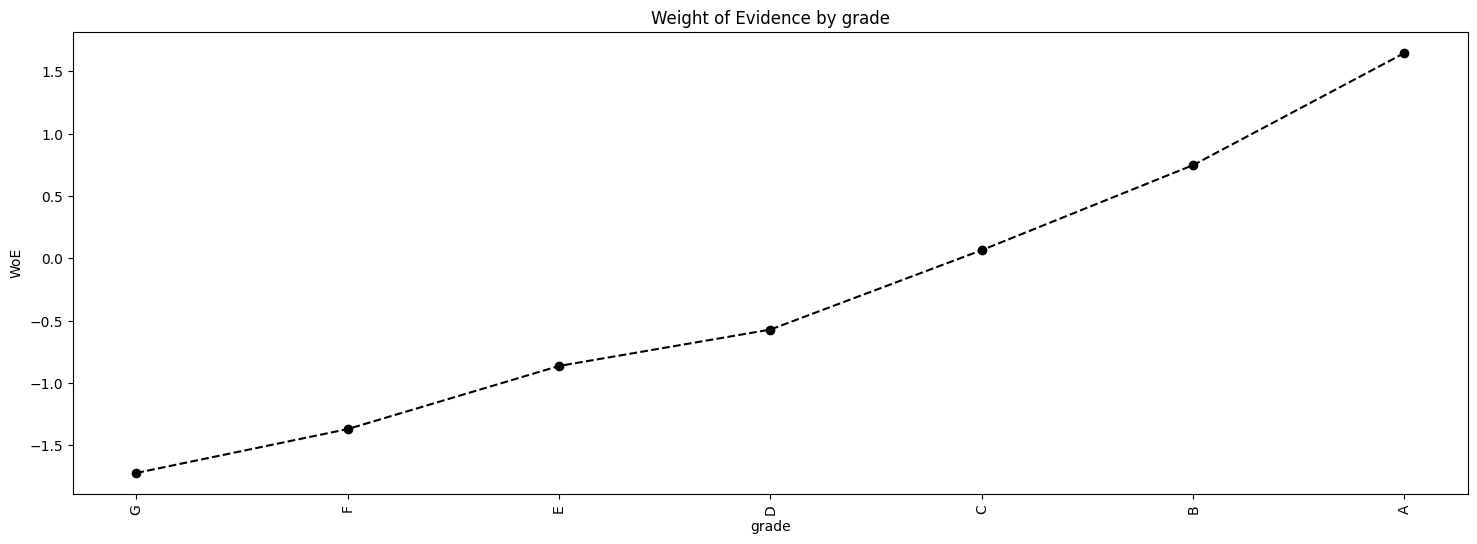

In [23]:
df_temp = calculate_woe_iv(df_inputs_prepr["grade"], df_targets_prepr)
plot_woe(df_temp,'grade')

good_bad,home_ownership,prop_0,prop_1,count_0,count_1,WoE_i,IV_i,IV
0,RENT,0.492549,0.396321,3867.0,163777.0,-0.217368,0.020917,0.043513
1,OWN,0.112215,0.108616,881.0,44885.0,-0.032594,0.000117,0.043513
2,MORTGAGE,0.395236,0.495057,3103.0,204579.0,0.225190,0.022479,0.043513
3,ANY,NaN,0.000005,NaN,2.0,NaN,NaN,0.043513


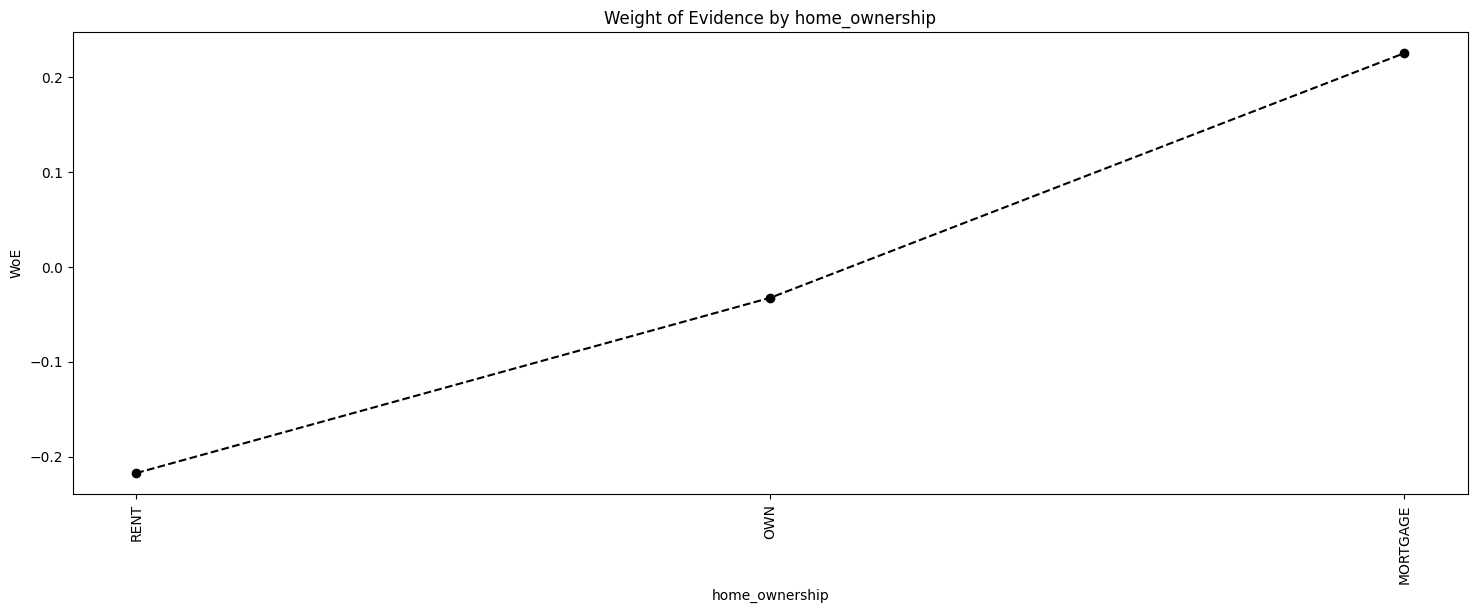

In [24]:
df_temp = calculate_woe_iv(df_inputs_prepr["home_ownership"], df_targets_prepr)
plot_woe(df_temp,'home_ownership')
df_temp

In [25]:
# combining the categories none, other with rent since the prior doesn't have enough data points
## 2
df_inputs_prepr['home_ownership_RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership_RENT'],
                                                            df_inputs_prepr['home_ownership_ANY']])

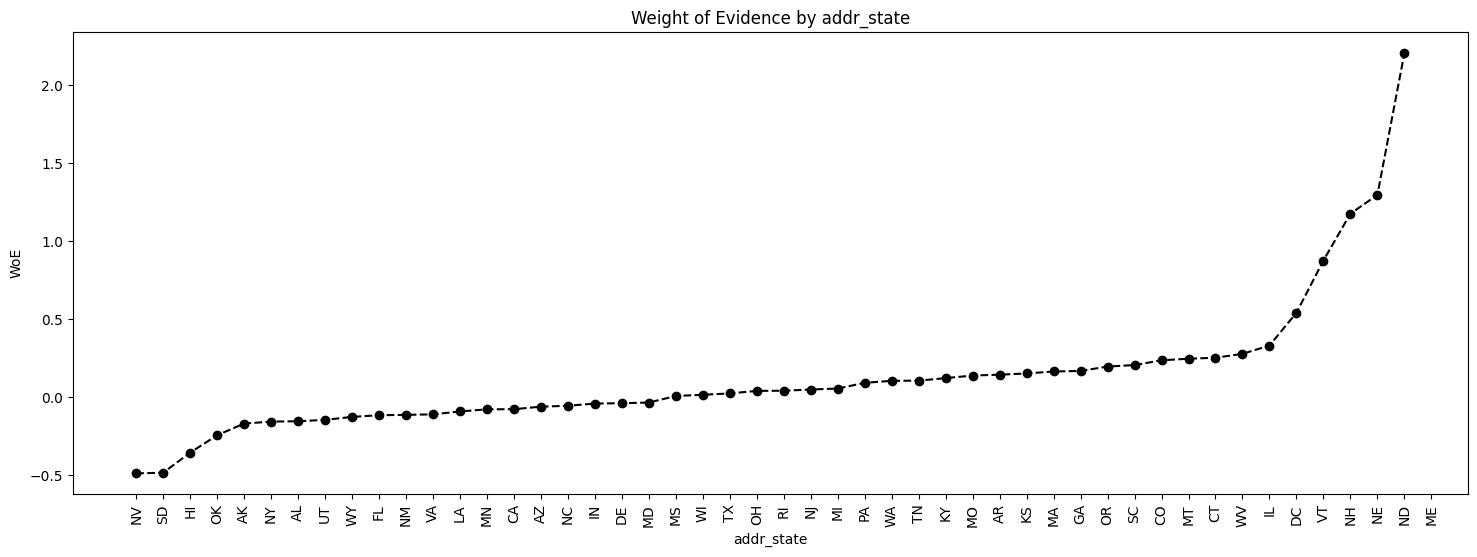

In [26]:
df_inputs_prepr['addr_state'].value_counts()
df_temp = calculate_woe_iv(df_inputs_prepr["addr_state"], df_targets_prepr)
plot_woe(df_temp,'addr_state')

In [27]:
## 3
if 'addr_state_ND' in list(df_inputs_prepr):
    pass
else:
    df_inputs_prepr['addr_state_ND'] = 0
    
if 'addr_state_ID' in list(df_inputs_prepr):
    pass
else:
    df_inputs_prepr['addr_state_ID'] = 0
    
if 'addr_state_IA' in list(df_inputs_prepr):
    pass
else:
    df_inputs_prepr['addr_state_IA'] = 0

In [28]:
## 4
df_inputs_prepr['addr_state_ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state_ND'],
                                                          df_inputs_prepr['addr_state_NE'],
                                                          df_inputs_prepr['addr_state_IA'],
                                                          df_inputs_prepr['addr_state_NV'],
                                                          df_inputs_prepr['addr_state_FL'],
                                                          df_inputs_prepr['addr_state_HI'],
                                                          df_inputs_prepr['addr_state_AL'],])
# Combining WV, NH, WY, DC plus ME, ID 
## 5
df_inputs_prepr['addr_state_WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state_WV'], df_inputs_prepr['addr_state_NH'],
                                              df_inputs_prepr['addr_state_WY'], df_inputs_prepr['addr_state_DC'],
                                              df_inputs_prepr['addr_state_ME'], df_inputs_prepr['addr_state_ID']])
df_inputs_prepr['addr_state_NM_VA'] = sum([df_inputs_prepr['addr_state_NM'], df_inputs_prepr['addr_state_VA']])

df_inputs_prepr['addr_state_OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state_OK'], df_inputs_prepr['addr_state_TN'],
                                              df_inputs_prepr['addr_state_MO'], df_inputs_prepr['addr_state_LA'],
                                              df_inputs_prepr['addr_state_MD'], df_inputs_prepr['addr_state_NC']])

df_inputs_prepr['addr_state_UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state_UT'], df_inputs_prepr['addr_state_KY'],
                                              df_inputs_prepr['addr_state_AZ'], df_inputs_prepr['addr_state_NJ']])

df_inputs_prepr['addr_state_AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state_AR'], df_inputs_prepr['addr_state_MI'],
                                              df_inputs_prepr['addr_state_PA'], df_inputs_prepr['addr_state_OH'],
                                              df_inputs_prepr['addr_state_MN']])

df_inputs_prepr['addr_state_RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state_RI'], df_inputs_prepr['addr_state_MA'],
                                              df_inputs_prepr['addr_state_DE'], df_inputs_prepr['addr_state_SD'],
                                              df_inputs_prepr['addr_state_IN']])

df_inputs_prepr['addr_state_GA_WA_OR'] = sum([df_inputs_prepr['addr_state_GA'], df_inputs_prepr['addr_state_WA'],
                                              df_inputs_prepr['addr_state_OR']])

df_inputs_prepr['addr_state_WI_MT'] = sum([df_inputs_prepr['addr_state_WI'], df_inputs_prepr['addr_state_MT']])

df_inputs_prepr['addr_state_IL_CT'] = sum([df_inputs_prepr['addr_state_IL'], df_inputs_prepr['addr_state_CT']])

df_inputs_prepr['addr_state_KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state_KS'], df_inputs_prepr['addr_state_SC'],
                                              df_inputs_prepr['addr_state_CO'], df_inputs_prepr['addr_state_VT'],
                                              df_inputs_prepr['addr_state_AK'], df_inputs_prepr['addr_state_MS']])
# NewYork and California has significant amount of data hence needs to be kept as separate variables

In [29]:
df_inputs_prepr['verification_status'].value_counts()

verification_status
Source Verified    179565
Verified           123016
Not Verified       118513
Name: count, dtype: int64

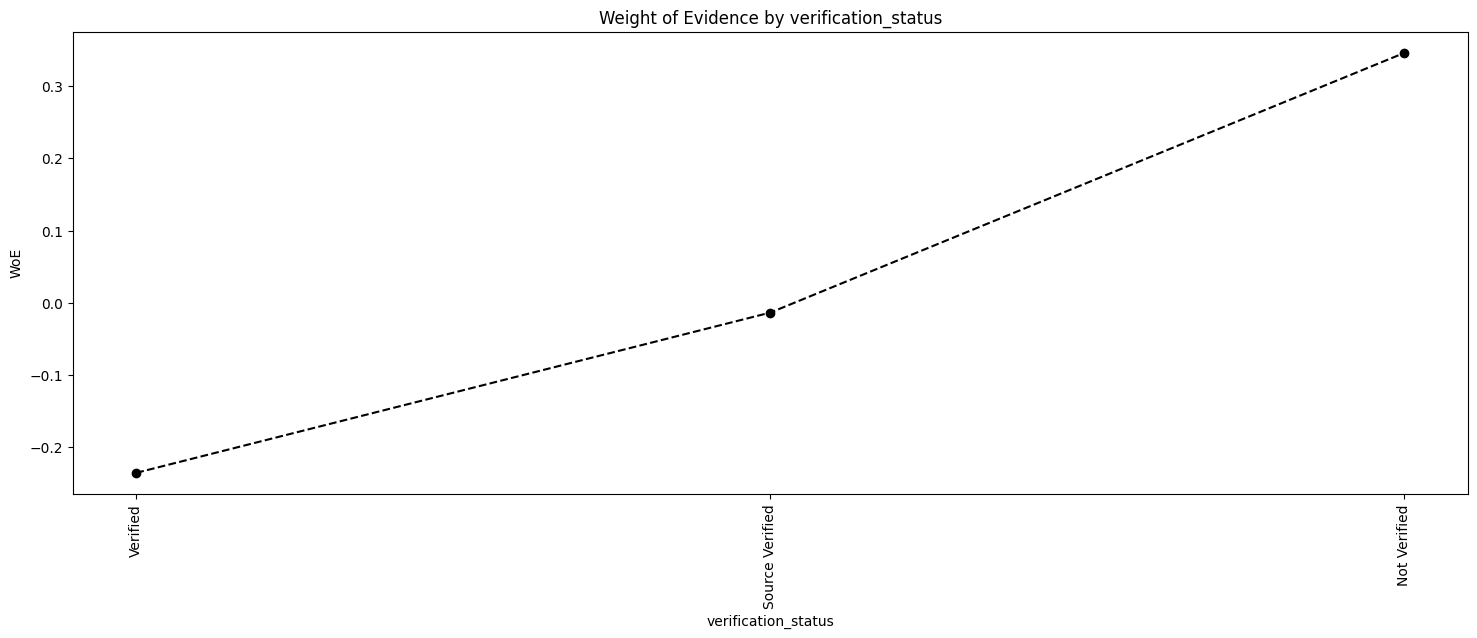

In [30]:
df_temp = calculate_woe_iv(df_inputs_prepr['verification_status'], df_targets_prepr)
plot_woe(df_temp,'verification_status')

In [31]:
df_inputs_prepr['purpose'].value_counts()

purpose
debt_consolidation    250020
credit_card           102025
home_improvement       25292
other                  19204
major_purchase          7449
medical                 3938
car                     3466
small_business          3364
moving                  2420
vacation                2249
house                   1438
renewable_energy         224
wedding                    4
educational                1
Name: count, dtype: int64

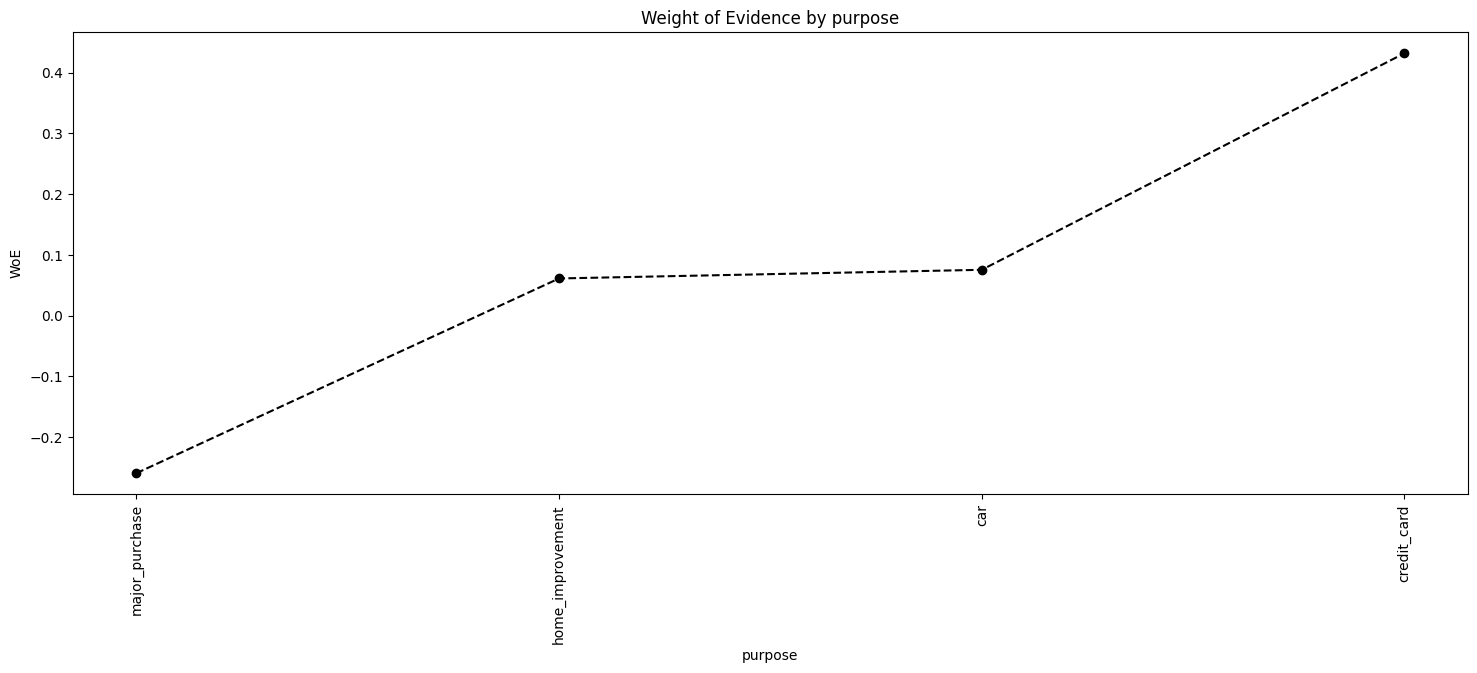

In [32]:
# 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house'
df_temp = calculate_woe_iv(df_inputs_prepr['purpose'], df_targets_prepr)
plot_woe(df_temp[~df_temp['purpose'].isin(['small_business','educational','moving','house',
                                           'other', 'renewable_energy','medical','wedding',
                                           'vacation','debt_consolidation'])],'purpose')

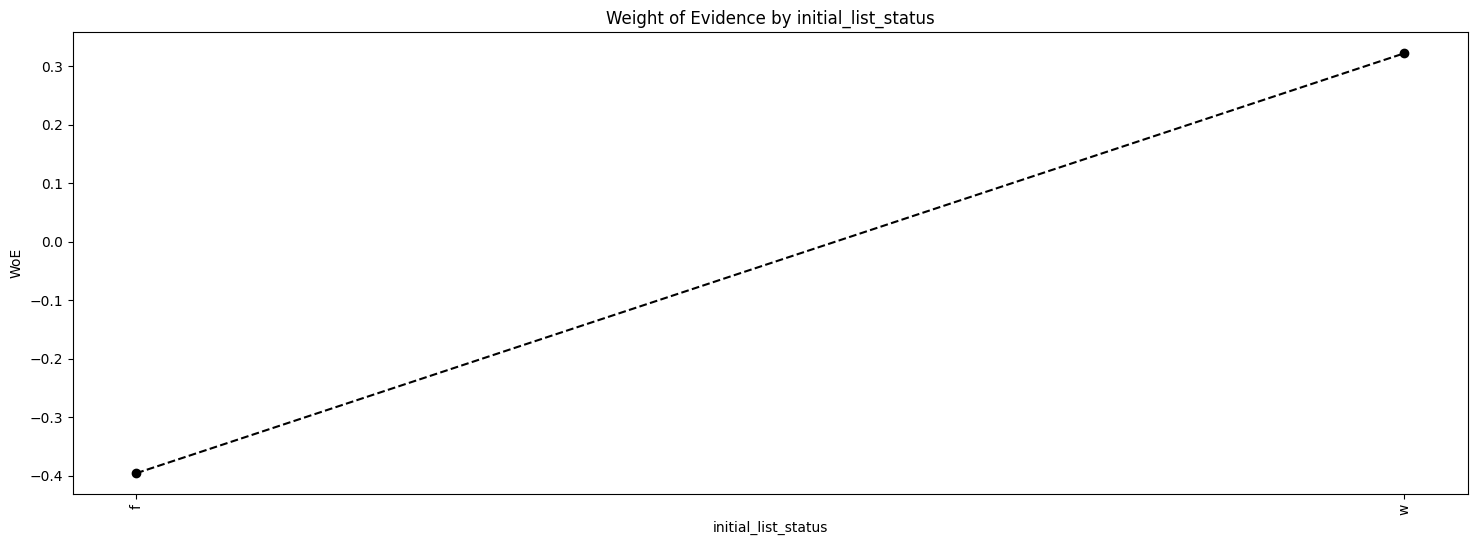

In [33]:
# combining small_business, educational
# combining moving, house
# combining other, renewable energy, medical
# combining wedding, vacation
# keeping debt_consolidation separately because of significant data
# keeping home improvement separately because of significant data
# combining major purchase, car
# keeping credit card separately because of significant data
## 6
df_inputs_prepr['purpose_educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose_educational'], df_inputs_prepr['purpose_small_business'],
                                                                 df_inputs_prepr['purpose_wedding'], df_inputs_prepr['purpose_renewable_energy'],
                                                                 df_inputs_prepr['purpose_moving'], df_inputs_prepr['purpose_house']])
df_inputs_prepr['purpose_oth__med__vacation'] = sum([df_inputs_prepr['purpose_other'], df_inputs_prepr['purpose_medical'],
                                             df_inputs_prepr['purpose_vacation']])
df_inputs_prepr['purpose_major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose_major_purchase'], df_inputs_prepr['purpose_car'],
                                                        df_inputs_prepr['purpose_home_improvement']])
df_inputs_prepr['initial_list_status'].value_counts()
df_temp = calculate_woe_iv(df_inputs_prepr['initial_list_status'], df_targets_prepr)
plot_woe(df_temp,'initial_list_status')

In [34]:
# Preprocessing continuous variables
df_inputs_prepr['term_int'].value_counts()

term_int
36    283172
60    137922
Name: count, dtype: int64

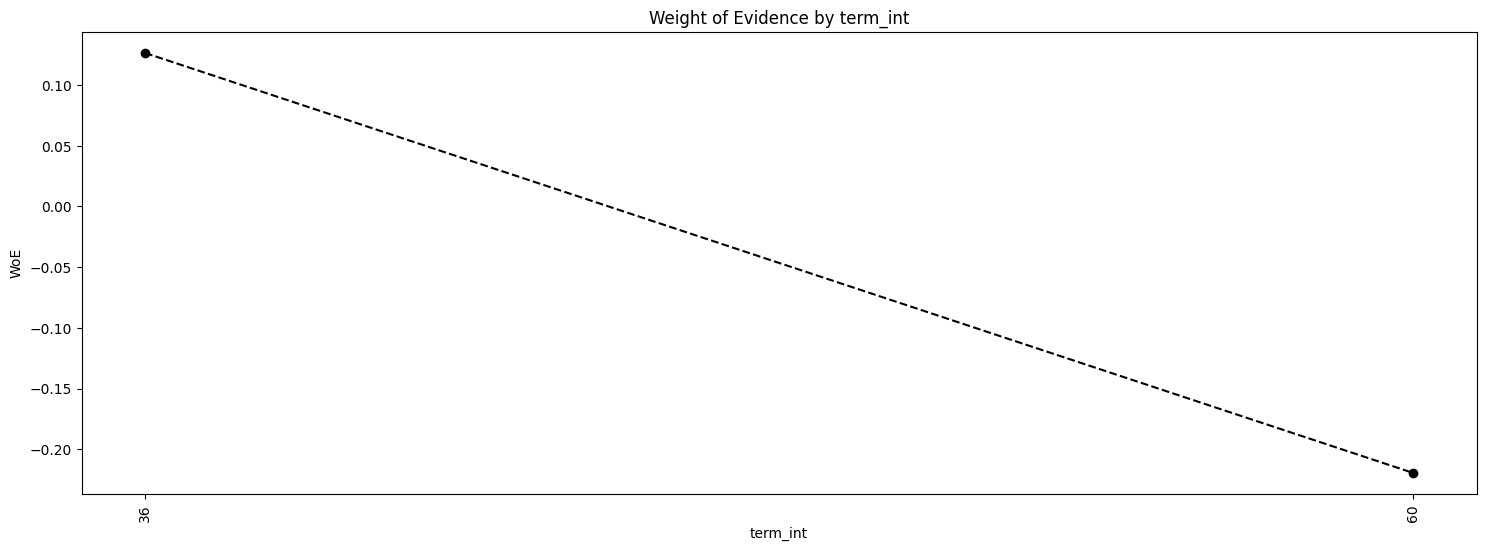

In [35]:
df_temp = calculate_woe_iv(df_inputs_prepr['term_int'], df_targets_prepr)
plot_woe(df_temp.sort_values('term_int', ascending = True).reset_index(drop = True),'term_int')

In [36]:
## 7
df_inputs_prepr['term_36'] = np.where(df_inputs_prepr['term_int'] == 36, 1,0)
df_inputs_prepr['term_60'] = np.where(df_inputs_prepr['term_int'] == 60, 1,0)
df_inputs_prepr['emp_length_int'].value_counts()


emp_length_int
10.0    141520
0.0      58157
2.0      37497
3.0      33430
1.0      27473
5.0      24930
4.0      24506
8.0      21560
7.0      18414
6.0      16838
9.0      16769
Name: count, dtype: int64

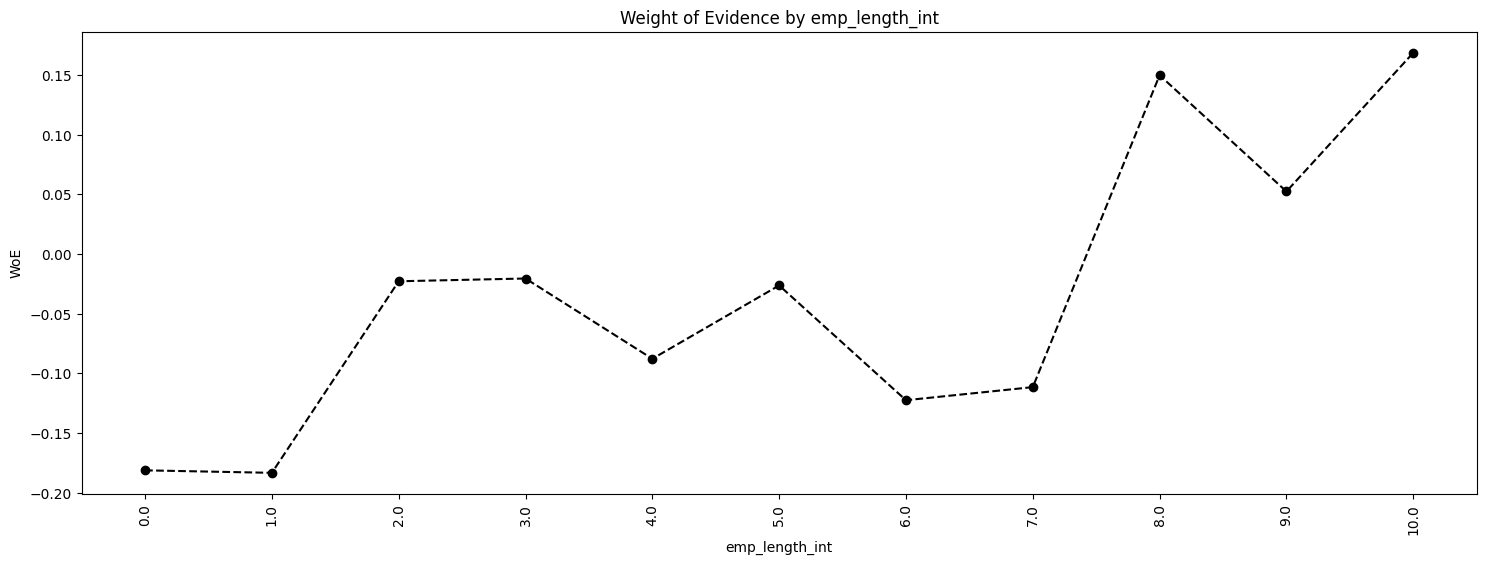

In [37]:
df_temp = calculate_woe_iv(df_inputs_prepr['emp_length_int'], df_targets_prepr)
plot_woe(df_temp.sort_values('emp_length_int', ascending = True).reset_index(drop = True),'emp_length_int')

In [38]:
df_temp

good_bad,emp_length_int,prop_0,prop_1,count_0,count_1,WoE_i,IV_i,IV
0,1.0,0.078079,0.064998,613,26860,-0.183366,0.002399,0.019134
1,0.0,0.164947,0.137599,1295,56862,-0.181278,0.004958,0.019134
2,6.0,0.045090,0.039889,354,16484,-0.122546,0.000637,0.019134
3,7.0,0.048784,0.043633,383,18031,-0.111582,0.000575,0.019134
4,4.0,0.063431,0.058097,498,24008,-0.087853,0.000469,0.019134
5,5.0,0.060757,0.059173,477,24453,-0.026403,0.000042,0.019134
6,2.0,0.091071,0.089008,715,36782,-0.022914,0.000047,0.019134
7,3.0,0.081009,0.079358,636,32794,-0.020593,0.000034,0.019134
8,9.0,0.037830,0.039860,297,16472,0.052290,0.000106,0.019134
9,8.0,0.044198,0.051333,347,21213,0.149650,0.001068,0.019134


In [39]:
## 8
# We create the following categories_ '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'
# '0' will be the reference category
df_inputs_prepr['emp_length_0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length_1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length_2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length_5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length_7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length_10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

/var/folders/nz/9brs25k93qd9j8rw4y155hp00000gn/T/ipykernel_43080/158976096.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_series = df.groupby([cat_series.name,outcome_series.name])[outcome_series.name].count()


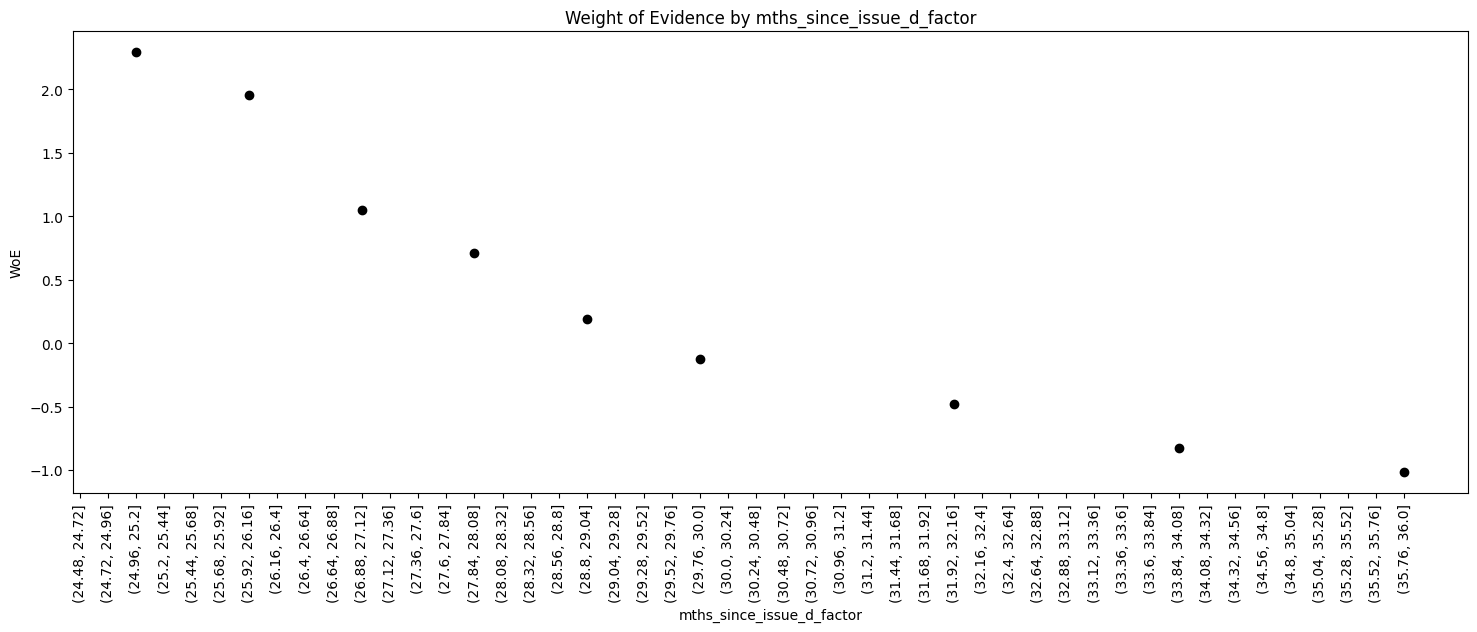

In [40]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'],50)
df_temp = calculate_woe_iv(df_inputs_prepr['mths_since_issue_d_factor'], df_targets_prepr)
plot_woe(df_temp.sort_values('mths_since_issue_d_factor', ascending = True).reset_index(drop = True),'mths_since_issue_d_factor')

In [41]:
## 9
# We create the following categories_
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_issue_d_<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d_38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d_40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d_42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d_49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d_53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d_65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d_>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

/var/folders/nz/9brs25k93qd9j8rw4y155hp00000gn/T/ipykernel_43080/158976096.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_series = df.groupby([cat_series.name,outcome_series.name])[outcome_series.name].count()
/var/folders/nz/9brs25k93qd9j8rw4y155hp00000gn/T/ipykernel_43080/158976096.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_series = df.groupby([cat_series.name,outcome_series.name])[outcome_series.name].count()
/var/folders/nz/9brs25k93qd9j8rw4y155hp00000gn/T/ipykernel_43080/158976096.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a fut

(421094, 318)

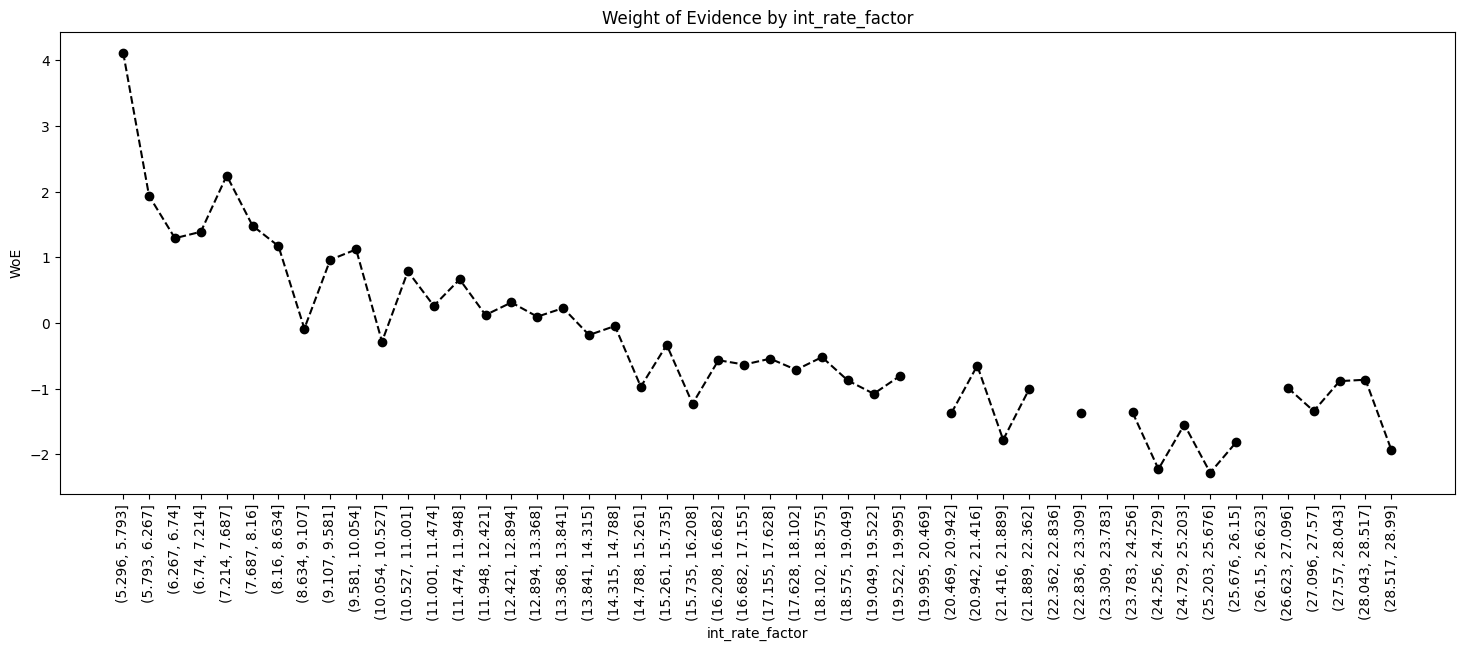

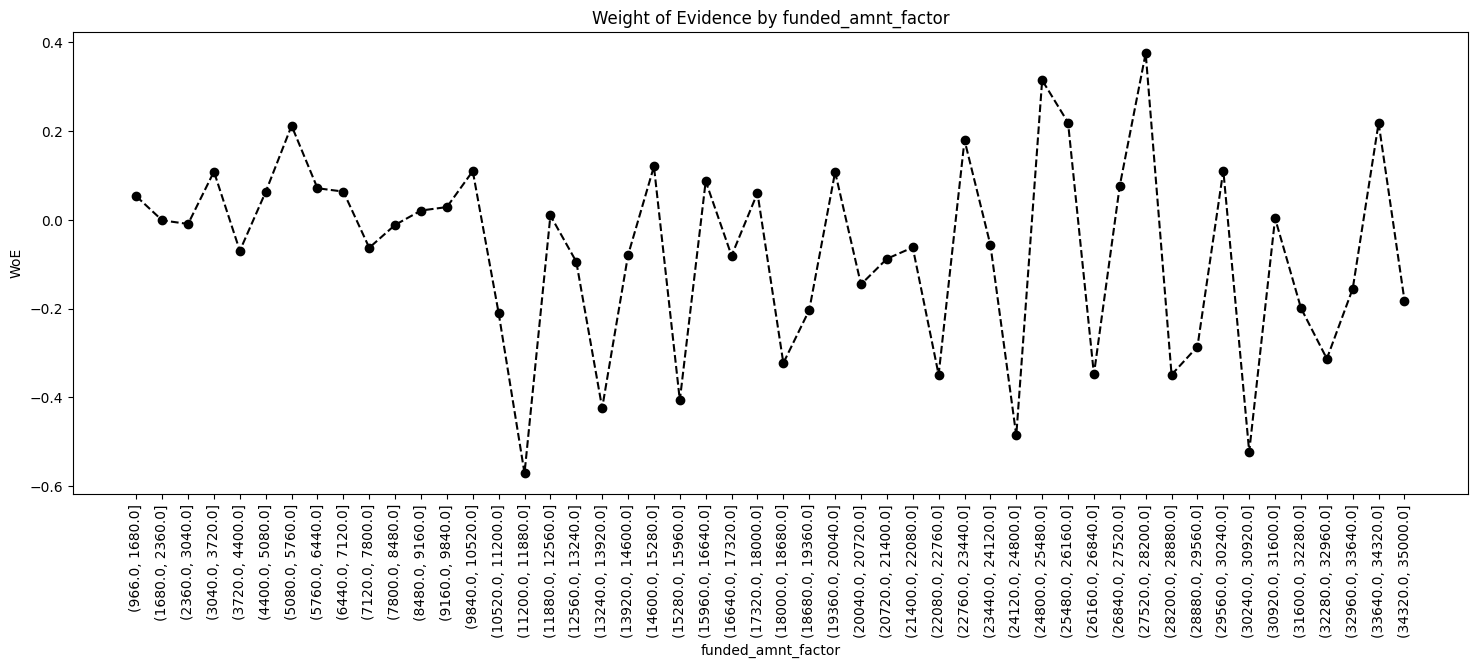

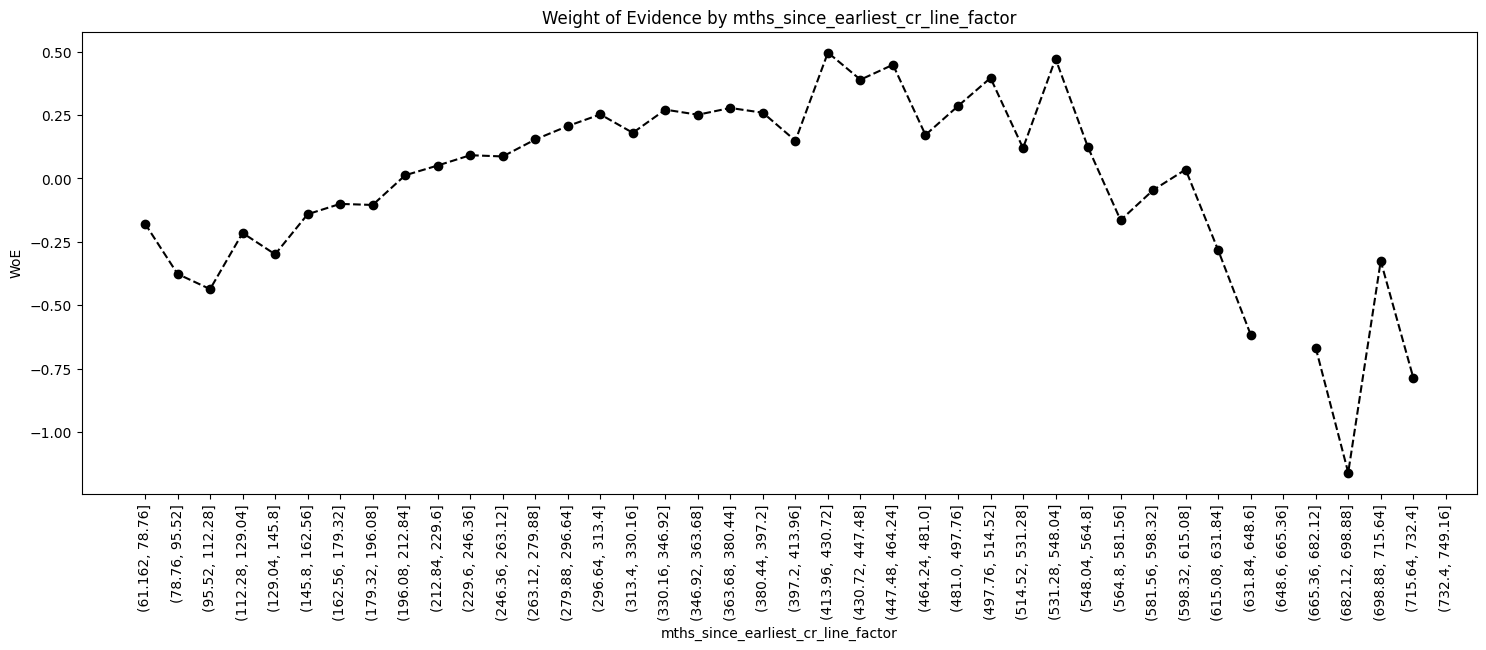

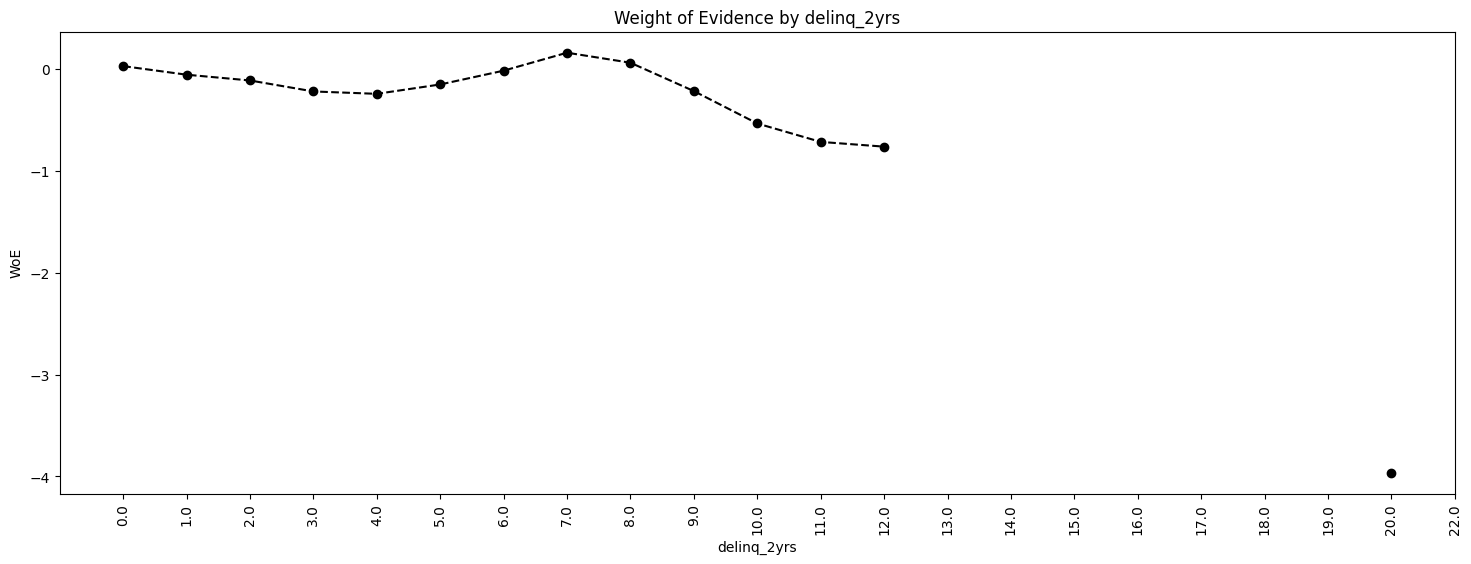

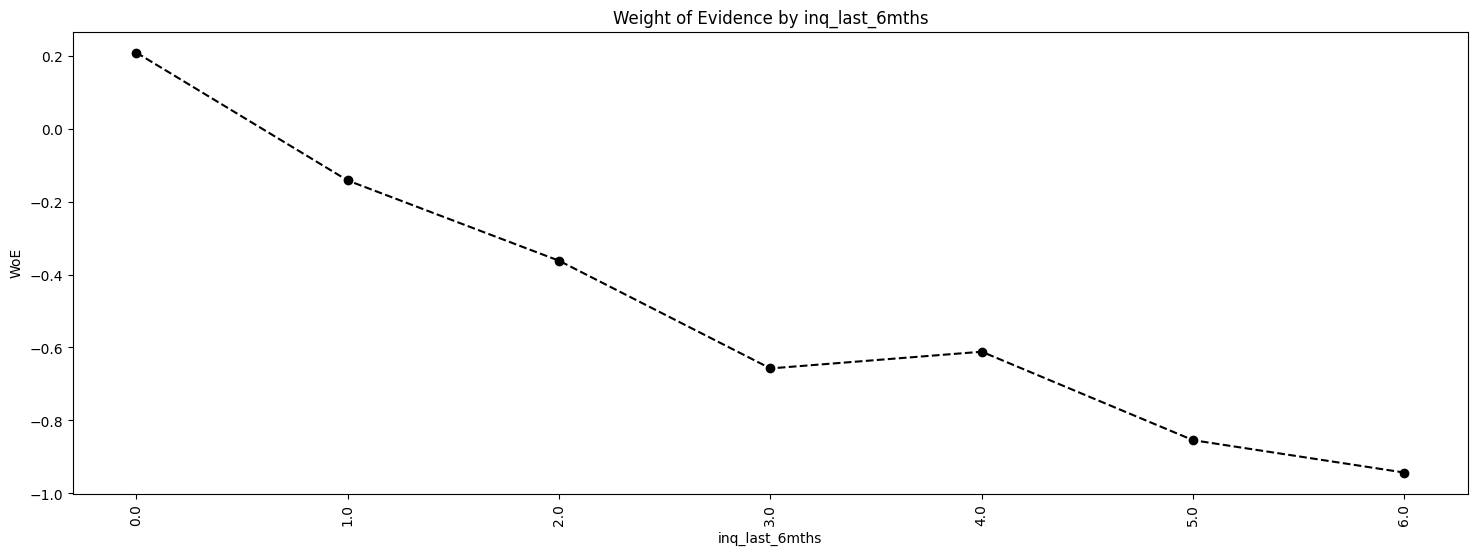

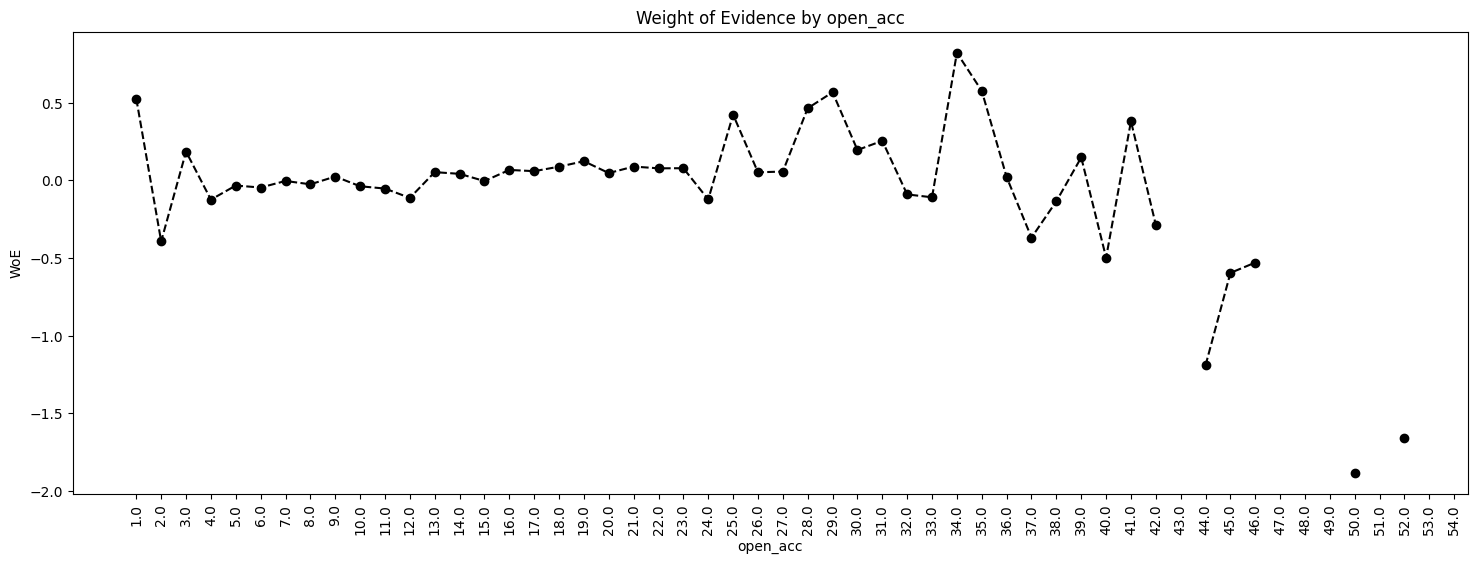

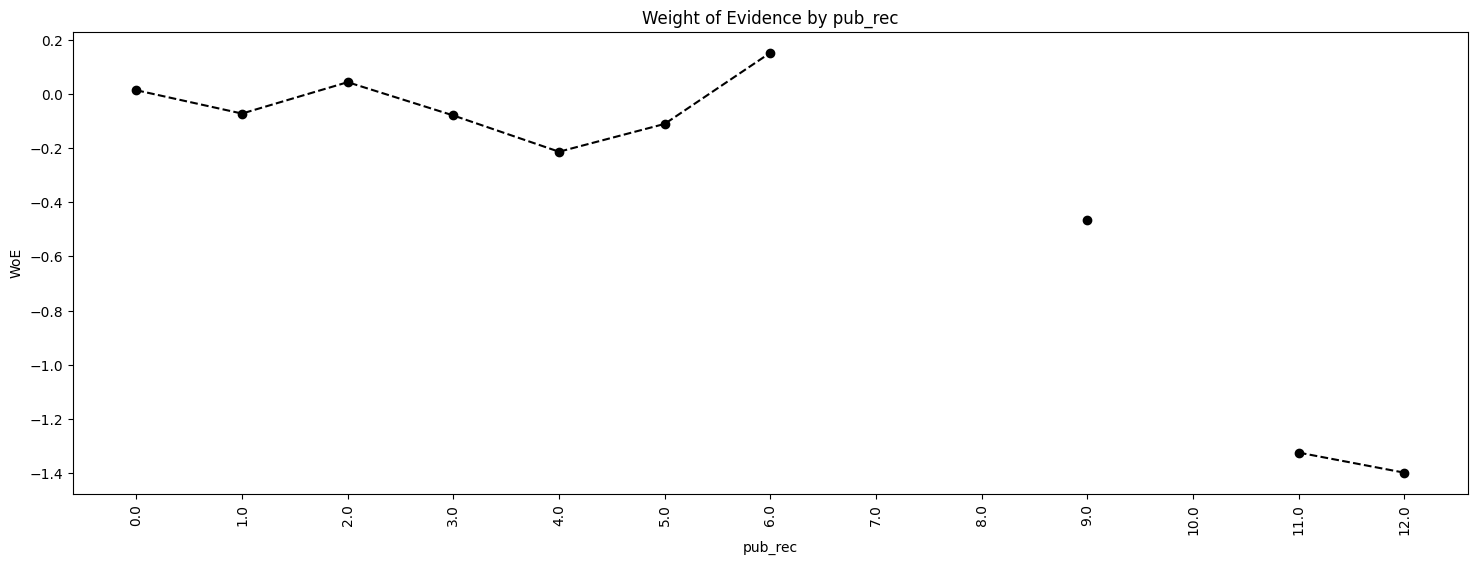

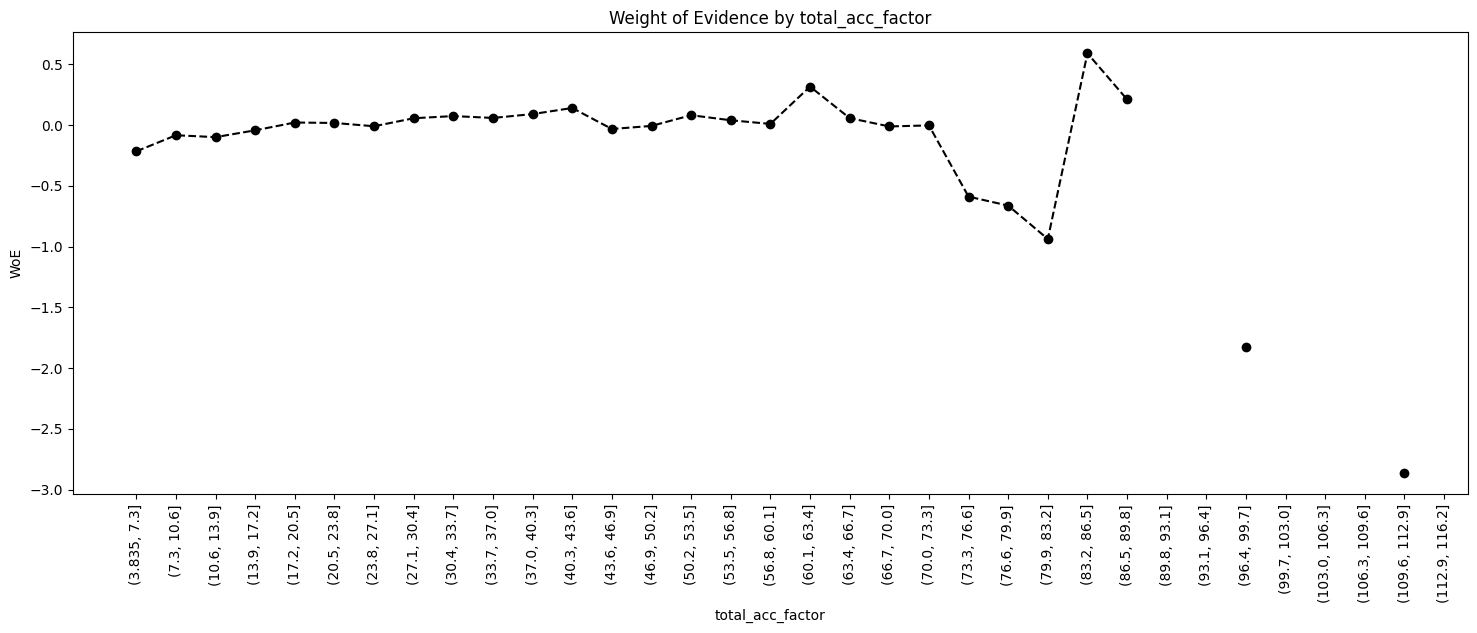

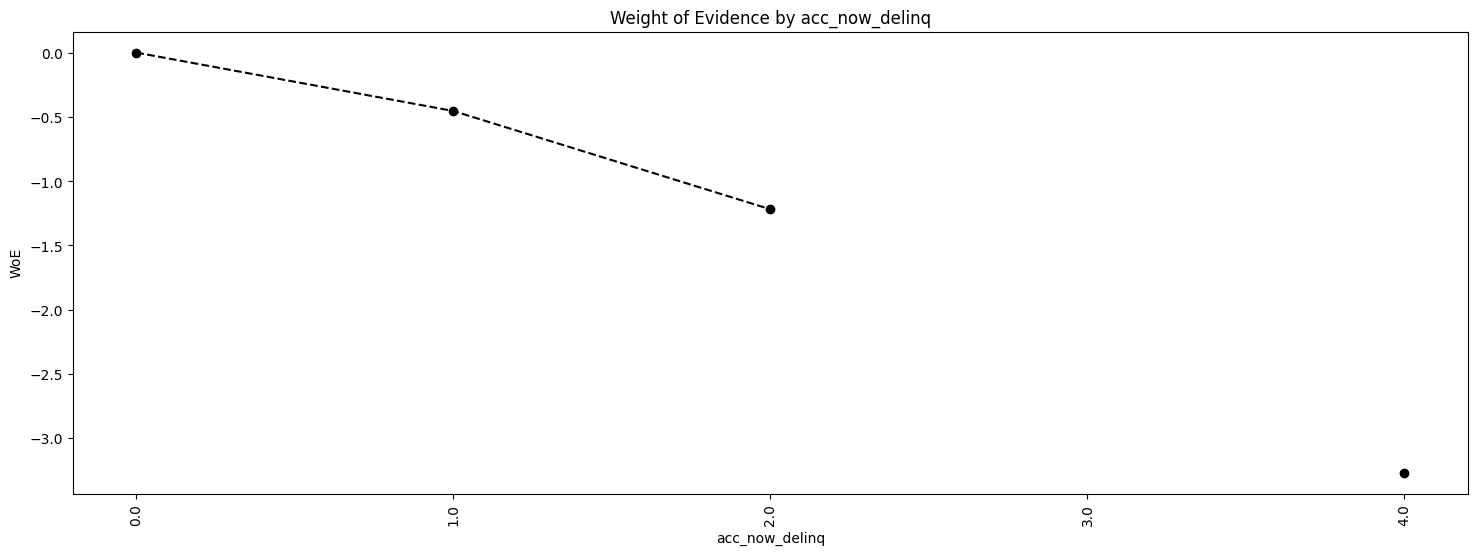

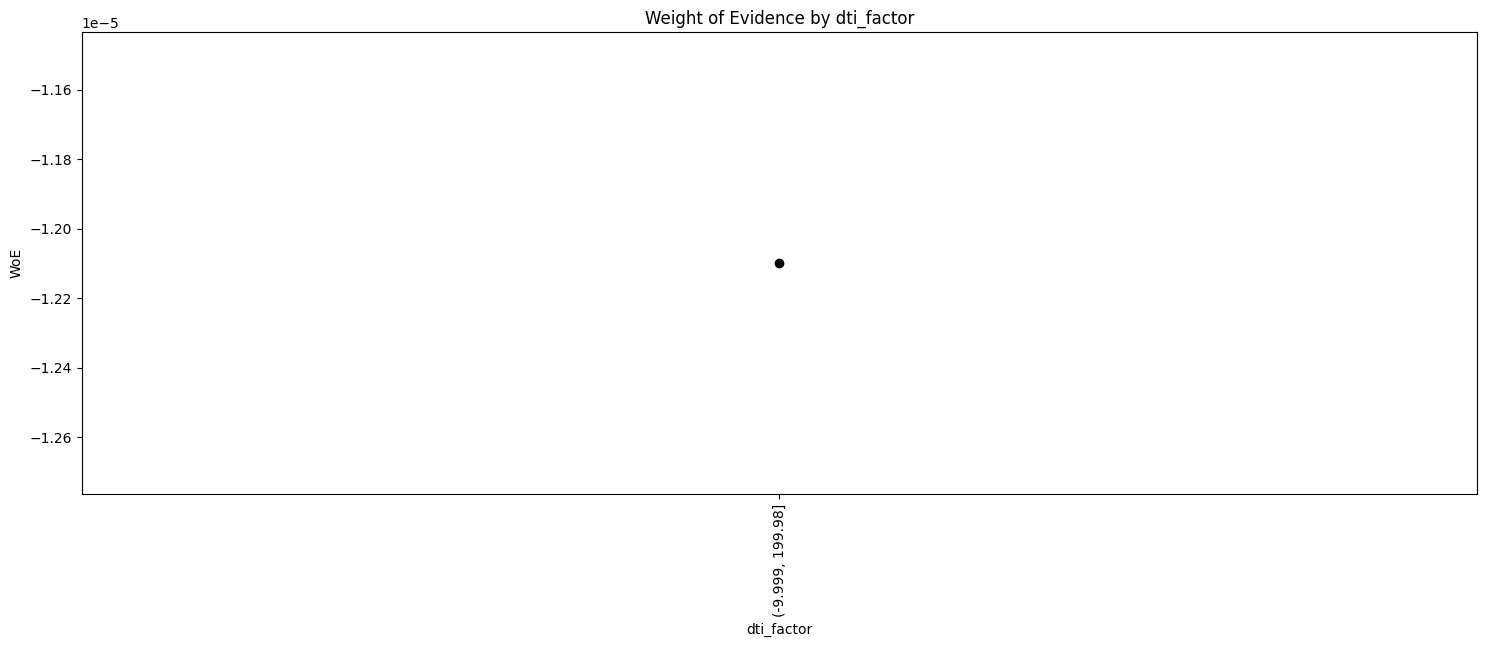

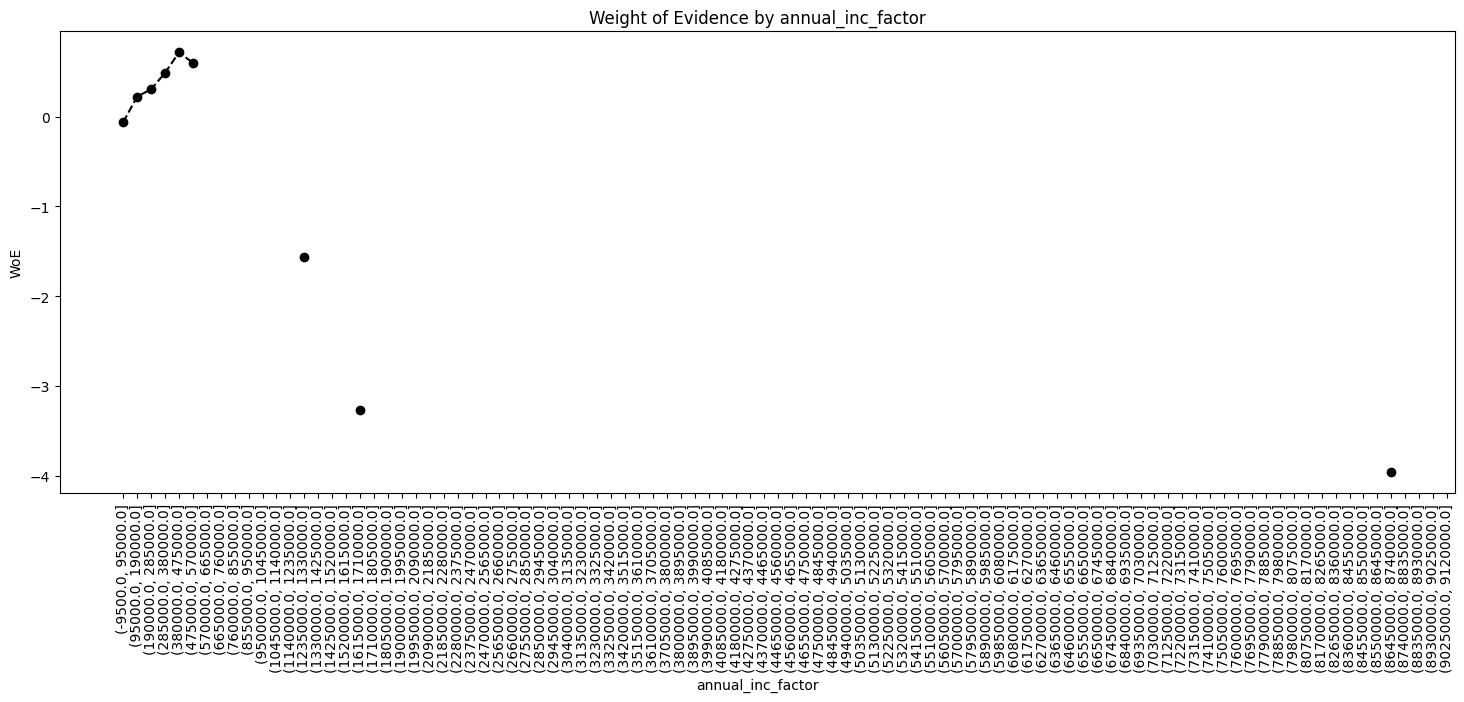

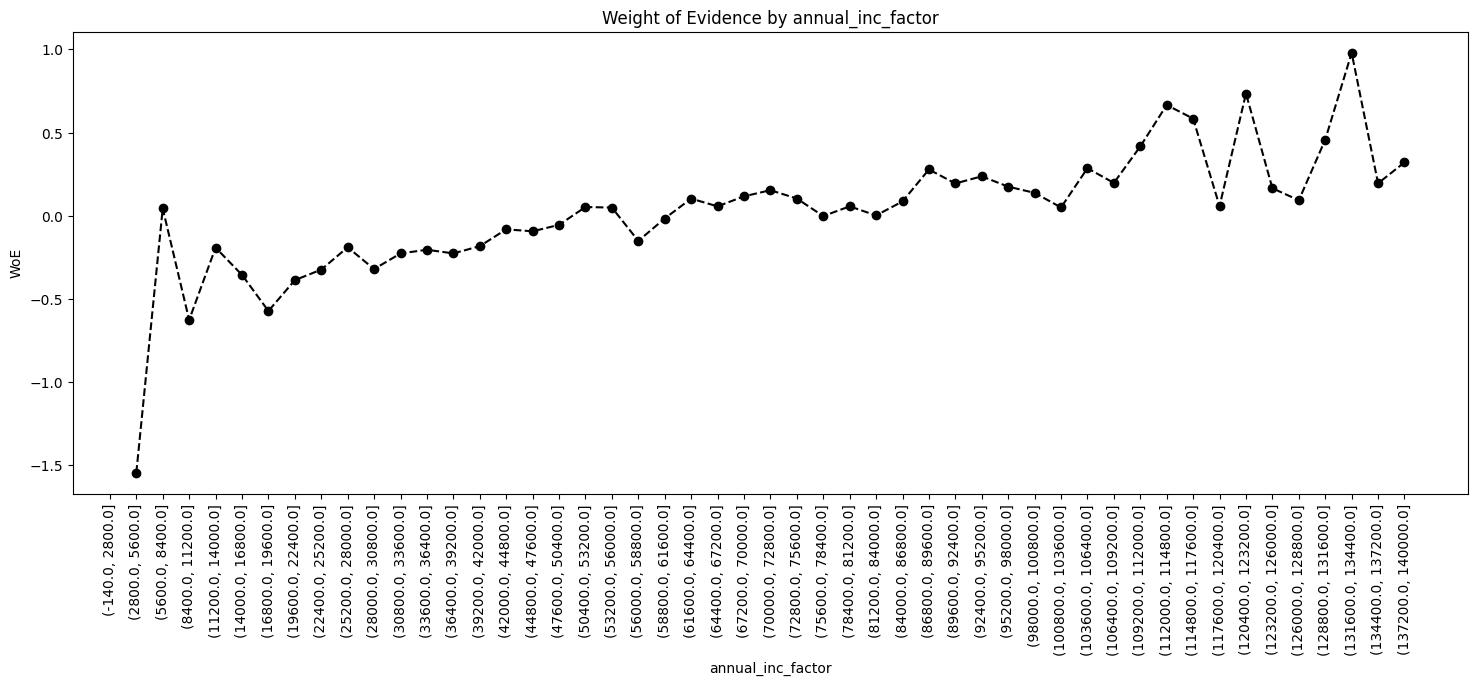

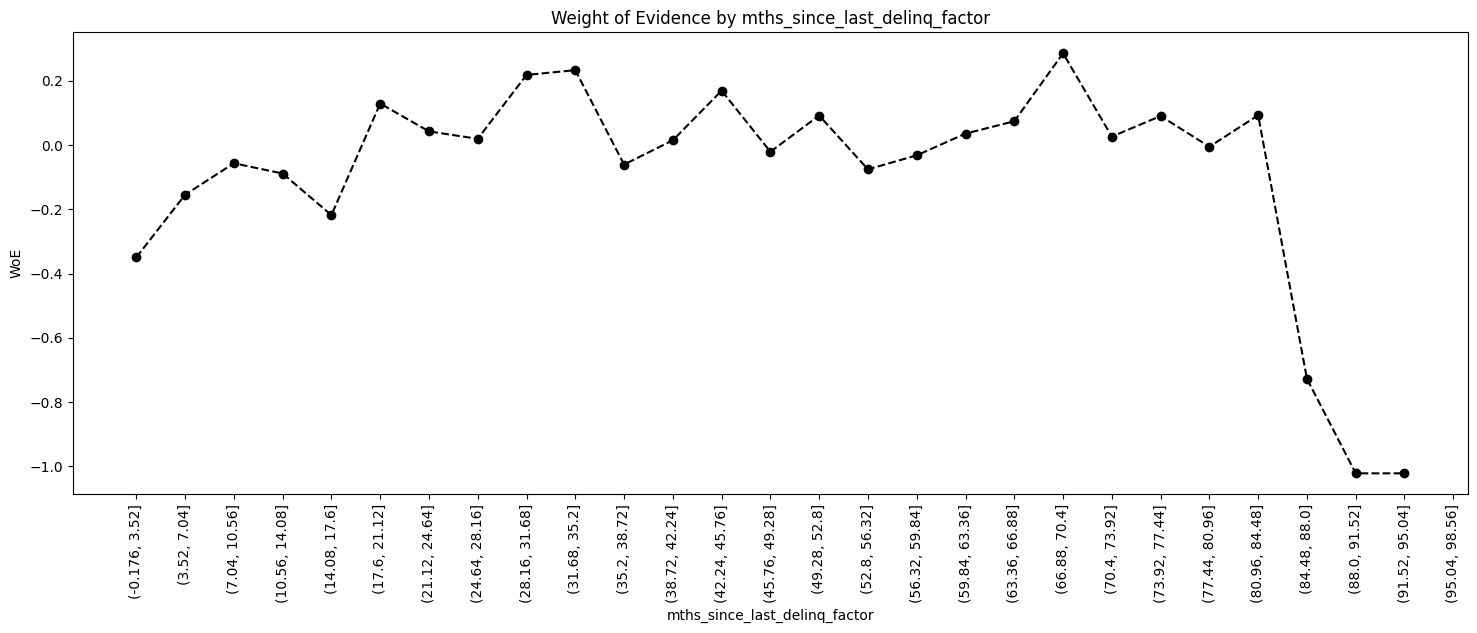

In [42]:

df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
df_temp = calculate_woe_iv(df_inputs_prepr['int_rate_factor'], df_targets_prepr)
plot_woe(df_temp.sort_values('int_rate_factor', ascending = True).reset_index(drop = True),'int_rate_factor')
## 10
df_inputs_prepr['int_rate_<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate_9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate_12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate_15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate_>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
df_temp = calculate_woe_iv(df_inputs_prepr['funded_amnt_factor'], df_targets_prepr)
plot_woe(df_temp.sort_values('funded_amnt_factor', ascending = True).reset_index(drop = True),'funded_amnt_factor')
# ‘mths_since_earliest_cr_line’;
# ‘installment’;
# ‘delinq_2yrs’;
# ‘inq_last_6mths’;
# ‘open_acc’;
# ‘pub_rec’;
# ‘total_acc’;
# ‘acc_now_delinq’.
df_inputs_prepr['mths_since_earliest_cr_line'].unique()
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'],50)
df_temp = calculate_woe_iv(df_inputs_prepr['mths_since_earliest_cr_line_factor'], df_targets_prepr)
plot_woe(df_temp.sort_values('mths_since_earliest_cr_line_factor', ascending = True).reset_index(drop = True),'mths_since_earliest_cr_line_factor')
## 11
# We create the following categories_
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line_<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line_141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line_165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line_248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line_271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line_>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)
df_inputs_prepr['delinq_2yrs'].unique()
df_temp = calculate_woe_iv(df_inputs_prepr['delinq_2yrs'], df_targets_prepr)
plot_woe(df_temp.sort_values('delinq_2yrs', ascending = True).reset_index(drop = True),'delinq_2yrs')
## 12
df_inputs_prepr['delinq_2yrs_0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs_1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs_>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 4), 1, 0)
df_inputs_prepr['inq_last_6mths'].unique()
df_temp = calculate_woe_iv(df_inputs_prepr['inq_last_6mths'], df_targets_prepr)
plot_woe(df_temp.sort_values('inq_last_6mths', ascending = True).reset_index(drop = True),'inq_last_6mths')
## 13
# Categories_ 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths_0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths_1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths_3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths_>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)
df_inputs_prepr['open_acc'].unique()
df_temp = calculate_woe_iv(df_inputs_prepr['open_acc'], df_targets_prepr)
plot_woe(df_temp.sort_values('open_acc', ascending = True).reset_index(drop = True),'open_acc')
## 14
# Categories_ '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc_0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc_1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc_4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc_13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc_18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc_23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc_26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc_>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)
df_inputs_prepr['pub_rec'].unique()
df_temp = calculate_woe_iv(df_inputs_prepr['pub_rec'], df_targets_prepr)
plot_woe(df_temp.sort_values('pub_rec', ascending = True).reset_index(drop = True),'pub_rec')
## 15
df_inputs_prepr['pub_rec_0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec_3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec_>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)
df_inputs_prepr['total_acc'].unique()
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'],50)
df_temp = calculate_woe_iv(df_inputs_prepr['total_acc_factor'], df_targets_prepr)
plot_woe(df_temp.sort_values('total_acc_factor', ascending = True).reset_index(drop = True),'total_acc_factor')
## 16
df_inputs_prepr['total_acc_<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc_28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc_>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)
df_inputs_prepr['acc_now_delinq'].unique()
df_temp = calculate_woe_iv(df_inputs_prepr['acc_now_delinq'], df_targets_prepr)
plot_woe(df_temp.sort_values('acc_now_delinq', ascending = True).reset_index(drop = True),'acc_now_delinq')
## 17
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq_0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq_>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)
df_inputs_prepr['dti'].unique()
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'],50)
df_temp = calculate_woe_iv(df_inputs_prepr['dti_factor'], df_targets_prepr)
plot_woe(df_temp.sort_values('dti_factor', ascending = True).reset_index(drop = True),'dti_factor')
## 18
df_inputs_prepr['dti_<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti_1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti_3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti_7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti_10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti_16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti_20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti_21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti_22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti_>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)
df_inputs_prepr['mths_since_last_record'].unique()
## 19
df_inputs_prepr['mths_since_last_record_Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record_0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record_3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record_21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record_32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record_81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record_>=86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 86), 1, 0)
df_inputs_prepr['annual_inc'].unique()
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'],100)
df_temp = calculate_woe_iv(df_inputs_prepr['annual_inc_factor'], df_targets_prepr)
plot_woe(df_temp.sort_values('annual_inc_factor', ascending = True).reset_index(drop = True),'annual_inc_factor')
df_temp.sort_values('annual_inc_factor', ascending = True).reset_index(drop = True).head(5)
# Split annual income into high and less and try to solve them separately
df_inputs_prepr_temp =  df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140_000]
df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'],50)

df_temp = calculate_woe_iv(df_inputs_prepr_temp['annual_inc_factor'], df_targets_prepr.loc[df_inputs_prepr_temp.index])
plot_woe(df_temp.sort_values('annual_inc_factor', ascending = True).reset_index(drop = True),'annual_inc_factor')
## 20
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc_<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc_20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc_30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc_40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc_50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc_60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc_70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc_80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc_90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc_100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc_120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc_>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)
# mths_since_last_delinq
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)

df_temp = calculate_woe_iv(df_inputs_prepr_temp['mths_since_last_delinq_factor'], df_targets_prepr.loc[df_inputs_prepr_temp.index])
plot_woe(df_temp.sort_values('mths_since_last_delinq_factor', ascending = True).reset_index(drop = True),'mths_since_last_delinq_factor')
## 21
# Categories_ Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq_Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq_0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq_4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq_31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq_>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

df_inputs_prepr['acc_now_delinq_0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq_>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

df_inputs_prepr['total_rev_hi_lim_<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim_5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim_10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim_20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim_30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim_40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim_55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim_>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)
df_inputs_prepr.shape

In [43]:
df_inputs_prepr.to_csv("loan_data_inputs_2015.csv")
df_targets_prepr.to_csv("loan_data_targets_2015.csv")

In [44]:
inputs_train_with_ref_cat = pd.read_csv("inputs_train_with_ref_cat.csv", index_col = 0)

In [45]:
loan_data_inputs_2015 = pd.read_csv("loan_data_inputs_2015.csv", index_col = 0)

/var/folders/nz/9brs25k93qd9j8rw4y155hp00000gn/T/ipykernel_43080/4253001696.py:1: DtypeWarning: Columns (20,56) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_inputs_2015 = pd.read_csv("loan_data_inputs_2015.csv", index_col = 0)


In [46]:
inputs_2015_with_ref_cat = loan_data_inputs_2015.loc[:, list(inputs_train_with_ref_cat)]

In [47]:
df_scorecard = pd.read_csv("df_scorecard.csv", index_col = 0)

In [48]:
inputs_train_with_ref_cat_w_intercept = inputs_train_with_ref_cat.copy()
inputs_train_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
inputs_train_with_ref_cat_w_intercept = inputs_train_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [49]:
inputs_2015_with_ref_cat_w_intercept = inputs_2015_with_ref_cat.copy()
inputs_2015_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
inputs_2015_with_ref_cat_w_intercept = inputs_2015_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [50]:
scorecard_scores = df_scorecard['Score - Preliminary']
scorecard_scores = scorecard_scores.values.reshape(102,1)

In [51]:
y_scores_train = inputs_train_with_ref_cat_w_intercept.dot(scorecard_scores)


In [52]:
y_scores_train.rename(columns = {0:"Score"}, inplace = True)

In [53]:
y_scores_2015 = inputs_2015_with_ref_cat_w_intercept.dot(scorecard_scores)
y_scores_2015.rename(columns = {0:"Score"}, inplace = True)

In [54]:
inputs_train_with_ref_cat_w_intercept = pd.concat([inputs_train_with_ref_cat_w_intercept, y_scores_train], axis = 1)

In [55]:
inputs_2015_with_ref_cat_w_intercept = pd.concat([inputs_2015_with_ref_cat_w_intercept, y_scores_2015], axis = 1)

In [56]:
inputs_train_with_ref_cat_w_intercept['Score:300-350'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 300) & (inputs_train_with_ref_cat_w_intercept['Score'] < 350), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:350-400'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 350) & (inputs_train_with_ref_cat_w_intercept['Score'] < 400), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:400-450'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 400) & (inputs_train_with_ref_cat_w_intercept['Score'] < 450), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:450-500'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 450) & (inputs_train_with_ref_cat_w_intercept['Score'] < 500), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:500-550'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 500) & (inputs_train_with_ref_cat_w_intercept['Score'] < 550), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:550-600'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 550) & (inputs_train_with_ref_cat_w_intercept['Score'] < 600), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:600-650'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 600) & (inputs_train_with_ref_cat_w_intercept['Score'] < 650), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:650-700'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 650) & (inputs_train_with_ref_cat_w_intercept['Score'] < 700), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:700-750'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 700) & (inputs_train_with_ref_cat_w_intercept['Score'] < 750), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:750-800'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 750) & (inputs_train_with_ref_cat_w_intercept['Score'] < 800), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:800-850'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 800) & (inputs_train_with_ref_cat_w_intercept['Score'] <= 850), 1, 0)
# We create dummy variables for score intervals in the dataframe with old ("expected").

In [57]:
inputs_2015_with_ref_cat_w_intercept['Score:300-350'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 300) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 350), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:350-400'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 350) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 400), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:400-450'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 400) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 450), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:450-500'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 450) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 500), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:500-550'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 500) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 550), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:550-600'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 550) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 600), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:600-650'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 600) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 650), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:650-700'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 650) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 700), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:700-750'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 700) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 750), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:750-800'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 750) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 800), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:800-850'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 800) & (inputs_2015_with_ref_cat_w_intercept['Score'] <= 850), 1, 0)
# We create dummy variables for score intervals in the dataframe with new ("actual").

# Population Stability Index Calculation & Interpretation

In [58]:
PSI_calc_train = inputs_train_with_ref_cat_w_intercept.sum() / inputs_train_with_ref_cat_w_intercept.shape[0]
PSI_calc_train.name = "Proportions_Train"

In [59]:
PSI_calc_2015 = inputs_2015_with_ref_cat_w_intercept.sum() / inputs_2015_with_ref_cat_w_intercept.shape[0]
PSI_calc_2015.name = "Proportions_New"

In [60]:
PSI_calc = pd.concat([PSI_calc_train, PSI_calc_2015], axis = 1).reset_index()

In [61]:
PSI_calc

,index,Proportions_Train,Proportions_New
0,Intercept,1.0,1.0
1,grade_A,0.1602,0.174154
2,grade_B,0.29416,0.279287
3,grade_C,0.268733,0.286318
4,grade_D,0.164862,0.148789
...,...,...,...
109,Score:600-650,0.186975,0.271697
110,Score:650-700,0.102027,0.22186
111,Score:700-750,0.034826,0.174474
112,Score:750-800,0.001842,0.025424


In [62]:
original_features = list(pd.read_csv("3.1 loan_data_2007_2014.csv", low_memory = False,index_col = 'Unnamed: 0')) + ['mths_since_earliest_cr_line',
                                                                                                                     'mths_since_issue_d']

In [63]:
original_features += ['Score'] 

In [64]:
def longest_prefix_match(val, string_lst):
    match_lst = [str_val for str_val in string_lst if val.startswith(str_val)]
    return max(match_lst, key = len) if match_lst else None

In [65]:
PSI_calc['Original feature name'] = PSI_calc['index'].apply(lambda x: longest_prefix_match(x, original_features))

In [66]:
PSI_calc = PSI_calc.loc[~PSI_calc['index'].isin(['Intercept','Score'])]

In [70]:
PSI_calc['Contribution'] = np.where((PSI_calc['Proportions_New'] == 0) |
    (PSI_calc['Proportions_Train'] == 0), 0, (PSI_calc['Proportions_New'] - PSI_calc['Proportions_Train']) * np.log(PSI_calc['Proportions_New'].astype(float)/
                                                             PSI_calc['Proportions_Train'].astype(float)))

/Users/berling/credit_risk_modeling_python/.venv_crm/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/nz/9brs25k93qd9j8rw4y155hp00000gn/T/ipykernel_43080/2618839923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PSI_calc['Contribution'] = np.where((PSI_calc['Proportions_New'] == 0) |


In [75]:
pd.options.display.max_rows = None

In [76]:
PSI_calc

,index,Proportions_Train,Proportions_New,Original feature name,Contribution
1,grade_A,0.1602,0.174154,grade,0.001165
2,grade_B,0.29416,0.279287,grade,0.000772
3,grade_C,0.268733,0.286318,grade,0.001115
4,grade_D,0.164862,0.148789,grade,0.001649
5,grade_E,0.076702,0.082993,grade,0.000496
6,grade_F,0.028228,0.023313,grade,0.00094
7,home_ownership_OWN,0.089256,0.108684,home_ownership,0.003826
8,home_ownership_MORTGAGE,0.506546,0.493196,home_ownership,0.000357
9,addr_state_NM_VA,0.036032,0.034159,addr_state,0.0001
10,addr_state_NY,0.08635,0.080372,addr_state,0.000429


In [72]:
PSI_calc.groupby(['Original feature name'])['Contribution'].sum()

Original feature name
Score                          1.170678
acc_now_delinq                 0.000925
addr_state                     0.003837
annual_inc                     0.005445
dti                            0.078143
emp_length                     0.007619
grade                          0.006775
home_ownership                 0.004275
initial_list_status            0.333717
inq_last_6mths                 0.046465
int_rate                        0.07923
mths_since_earliest_cr_line     0.03303
mths_since_issue_d             3.730498
mths_since_last_delinq         0.011594
mths_since_last_record         0.055505
purpose                        0.011645
term                           0.013099
verification_status            0.048219
Name: Contribution, dtype: object